Plots that were used in the paper

1)** Multif0 scores for all algorithms**

2) ** Track level overall accuracy differences **

3) Track level scores for each algorithm

4) Scores as a function of polyphony

In [89]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style('whitegrid')


Bach10

In [90]:
def get_dfbox(dataset, metrics):
    df_benetos = pd.DataFrame.from_csv("../outputs/{}_benetos_all_scores.csv".format(dataset))
    df_duan = pd.DataFrame.from_csv("../outputs/{}_duan_all_scores.csv".format(dataset))
    df_bittner = pd.DataFrame.from_csv("../comparisons/multif0/experiment11b_output/{}_all_scores.csv".format(dataset))
    
    boxdata = []
    for metric in metrics:
        boxdata.extend([
            df_benetos[metric],
            df_duan[metric],
            df_bittner[metric]
        ])

    dfbox = pd.DataFrame(np.array(boxdata).T)
    return dfbox

In [91]:
def add_plot(subplot_tuple, metrics, dfbox, title, show_yaxis=True, legend_loc=None, xlim=None):
    plt.subplot(subplot_tuple)
    plt.title(title, weight='bold')
    n_algs = 3
    n_metrics = len(metrics)
    positions = []
    k = 1
    for i in range(n_metrics):
        for j in range(n_algs):
            positions.append(k)
            k = k + 1
        k = k + 1

    current_palette = ["#E1D89F", "#8EA8BD", "#CF6766"]
    colors = current_palette*n_metrics

    box = plt.boxplot(
        dfbox.values, widths=0.8, positions=positions,
        patch_artist=True, showmeans=True,
        medianprops={'color': 'k'},
        meanprops=dict(marker='D', markeredgecolor='black',
            markerfacecolor='k'),
        vert=False
    )
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.xlabel('Score')
    if show_yaxis:
        plt.yticks(np.arange(2, 4*(n_metrics + 1) - 2, 4), metrics, rotation='horizontal', weight='bold')
    else:
        plt.yticks(np.arange(2, 4*(n_metrics + 1) - 2, 4), ['']*len(metrics), rotation='horizontal')

    if xlim is not None:
        plt.xlim(xlim)
        
    if legend_loc is not None:
        # draw temporary red and blue lines and use them to create a legend
        h_benetos, = plt.plot([1,1],'s',color=colors[0], markersize=10)
        h_duan, = plt.plot([1,1],'s',color=colors[1], markersize=10)
        h_cnn, = plt.plot([1,1],'s',color=colors[2], markersize=10)
        lgd = plt.legend((h_cnn, h_duan, h_benetos),('CNN', 'Duan', 'Benetos'), ncol=1, loc=legend_loc)

        h_benetos.set_visible(False)
        h_duan.set_visible(False)
        h_cnn.set_visible(False)

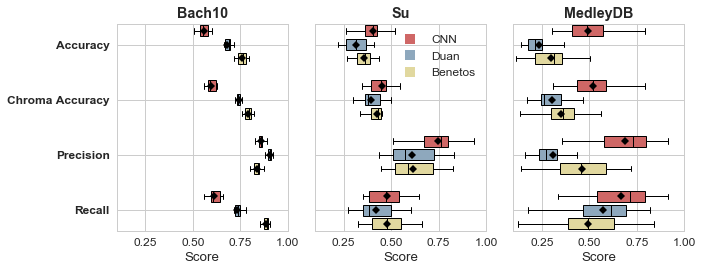

In [94]:
fig = plt.figure(figsize=(10, 4))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
metrics = ['Recall', 'Precision', 'Chroma Accuracy', 'Accuracy']
df_bach10 = get_dfbox('bach10', metrics)
df_su = get_dfbox('su', metrics)
df_mdb = get_dfbox('mdb_test', metrics)

add_plot(131, metrics, df_bach10, 'Bach10', xlim=[0.1, 1.0])
add_plot(132, metrics, df_su, 'Su', show_yaxis=False, xlim=[0.1, 1.0], legend_loc=1)
add_plot(133, metrics, df_mdb, 'MedleyDB', xlim=[0.1, 1.0], show_yaxis=False)

# metrics = ['Miss Error', 'Substitution Error', 'False Alarm Error', 'Total Error']
# df_bach10 = get_dfbox('bach10', metrics)
# df_su = get_dfbox('su', metrics)
# df_mdb = get_dfbox('mdb_test', metrics)

# add_plot(234, metrics, df_bach10, 'Bach10', xlim=[0.0, 0.5])
# add_plot(235, metrics, df_su, 'Su', show_yaxis=False, legend_loc=2, xlim=[0.0, 1.0])
# add_plot(236, metrics, df_mdb, 'MedleyDB', show_yaxis=False, xlim=[0, 4])

plt.tight_layout()
plt.savefig("../paper-figs/Multif0_accuracy.pdf", format='pdf', bbox_inches='tight')

In [53]:
def get_track_diffs(dataset):
    df_benetos = pd.DataFrame.from_csv("../outputs/{}_benetos_all_scores.csv".format(dataset))
    df_duan = pd.DataFrame.from_csv("../outputs/{}_duan_all_scores.csv".format(dataset))
    df_bittner = pd.DataFrame.from_csv("../comparisons/multif0/experiment11b_output/{}_all_scores.csv".format(dataset))

    tracks = df_benetos['track']
    bittner_accuracy = df_bittner['Accuracy']
    benetos_accuracy = df_benetos['Accuracy']
    duan_accuracy = df_duan['Accuracy']

    mdb_track_diffs = []
    for i, track in enumerate(tracks):
        mdb_track_diffs.append(bittner_accuracy[i] - np.max([benetos_accuracy[i], duan_accuracy[i]]))

    return tracks, mdb_track_diffs, [dataset]*len(tracks)

tracks_mdb, diffs_mdb, color_mdb = get_track_diffs('mdb_test')
tracks_bach10, diffs_bach10, color_bach10 = get_track_diffs('bach10')
tracks_su, diffs_su, color_su = get_track_diffs('su')

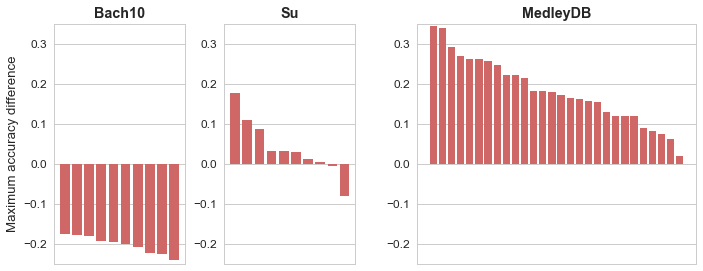

In [111]:
# all_tracks = np.concatenate([tracks_mdb, tracks_bach10, tracks_su])
# all_diffs = np.concatenate([diffs_mdb, diffs_bach10, diffs_su])
# all_colors = np.concatenate([color_mdb, color_bach10, color_su])
plt.figure(figsize=(10, 4))

k = 1
for tracks, diffs, title in zip(
    [tracks_bach10, tracks_su, tracks_mdb],
    [diffs_bach10, diffs_su, diffs_mdb],
    ['Bach10', 'Su', 'MedleyDB']):
    if k < 3:
        plt.subplot(1, 4, k)
    else:
        plt.subplot(1, 2, 2)
    sort_idx = np.flip(np.argsort(diffs), 0)
    
    sns.set(font_scale=1.2)
    sns.set_style('whitegrid')

    for i, j in enumerate(sort_idx):
        plt.bar(i, diffs[j], color='#CF6766')
    
    plt.title(title, weight='bold')
    plt.xticks([])
    
    if k == 1:
        plt.ylabel("Maximum accuracy difference")
    
    k = k + 1

    plt.ylim([-0.25, 0.35])
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0)
plt.savefig("../paper-figs/multif0_trackdiffs.pdf", format='pdf', bbox_inches='tight')

In [19]:
tracks = df_benetos['track']
bittner_accuracy = df_bittner['Accuracy']
benetos_accuracy = df_benetos['Accuracy']
duan_accuracy = df_duan['Accuracy']

([<matplotlib.axis.XTick at 0x10e29a5d0>,
 <a list of 28 Text xticklabel objects>)

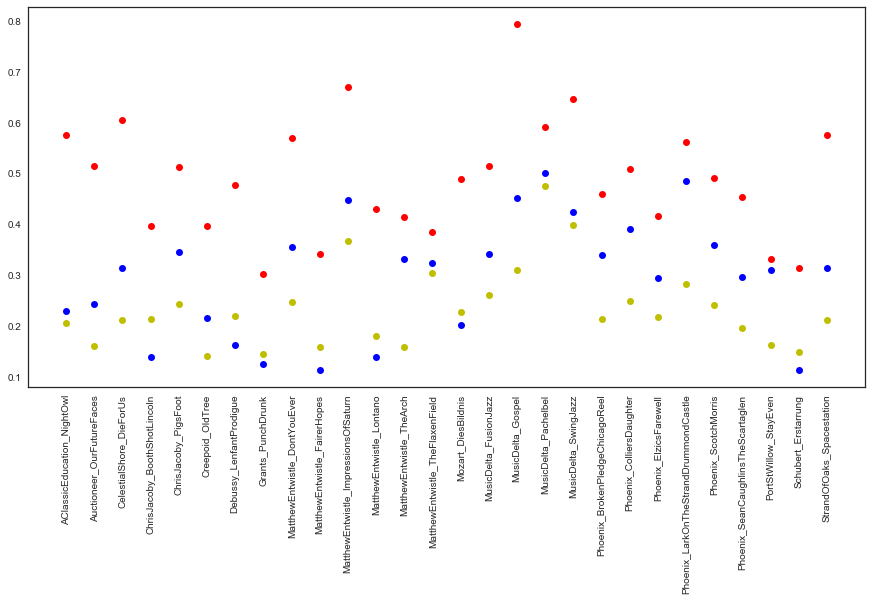

In [18]:
plt.figure(figsize=(15, 7))
sns.set_style('white')
plt.plot(bittner_accuracy, 'or')
plt.plot(benetos_accuracy, 'ob')
plt.plot(duan_accuracy, 'oy')
plt.xticks(range(len(tracks)), tracks, rotation='vertical')

In [17]:
tracks

0                AClassicEducation_NightOwl
1                 Auctioneer_OurFutureFaces
2                   CelestialShore_DieForUs
3              ChrisJacoby_BoothShotLincoln
4                      ChrisJacoby_PigsFoot
5                          Creepoid_OldTree
6                   Debussy_LenfantProdigue
7                         Grants_PunchDrunk
8              MatthewEntwistle_DontYouEver
9              MatthewEntwistle_FairerHopes
10     MatthewEntwistle_ImpressionsOfSaturn
11                 MatthewEntwistle_Lontano
12                 MatthewEntwistle_TheArch
13          MatthewEntwistle_TheFlaxenField
14                       Mozart_DiesBildnis
15                    MusicDelta_FusionJazz
16                        MusicDelta_Gospel
17                     MusicDelta_Pachelbel
18                     MusicDelta_SwingJazz
19          Phoenix_BrokenPledgeChicagoReel
20                 Phoenix_ColliersDaughter
21                   Phoenix_ElzicsFarewell
22    Phoenix_LarkOnTheStrandDru

In [24]:
tracks = [
    'AClassicEducation_NightOwl',
    'Auctioneer_OurFutureFaces',
    'CelestialShore_DieForUs',
    'ChrisJacoby_BoothShotLincoln',
    'ChrisJacoby_PigsFoot',
    'Creepoid_OldTree',
    'Debussy_LenfantProdigue',
    'Grants_PunchDrunk',
    'MatthewEntwistle_DontYouEver',
    'MatthewEntwistle_FairerHopes',
    'MatthewEntwistle_ImpressionsOfSaturn',
    'MatthewEntwistle_Lontano',
    'MatthewEntwistle_TheArch',
    'MatthewEntwistle_TheFlaxenField',
    'Mozart_DiesBildnis',
    'MusicDelta_FusionJazz',
    'MusicDelta_Gospel',
    'MusicDelta_Pachelbel',
    'MusicDelta_SwingJazz',
    'Phoenix_BrokenPledgeChicagoReel',
    'Phoenix_ColliersDaughter',
    'Phoenix_ElzicsFarewell',
    'Phoenix_LarkOnTheStrandDrummondCastle',
    'Phoenix_ScotchMorris',
    'Phoenix_SeanCaughlinsTheScartaglen',
    'PortStWillow_StayEven',
    'Schubert_Erstarrung',
    'StrandOfOaks_Spacestation'
]

In [25]:
import mir_eval

track_avg_poly = []
track_max_poly = []
for track in tracks:
    ground_truth_path = '../comparisons/multif0/datasets/mdb_test/gt_F0/{}.txt'.format(track)
    _, ref_freqs = mir_eval.io.load_ragged_time_series(ground_truth_path)
    polyph = [len(f) for f in ref_freqs]
    avg_polyphony = np.mean(polyph)
    max_polyphony = np.max(polyph)
    track_avg_poly.append(avg_polyphony)
    track_max_poly.append(max_polyphony)

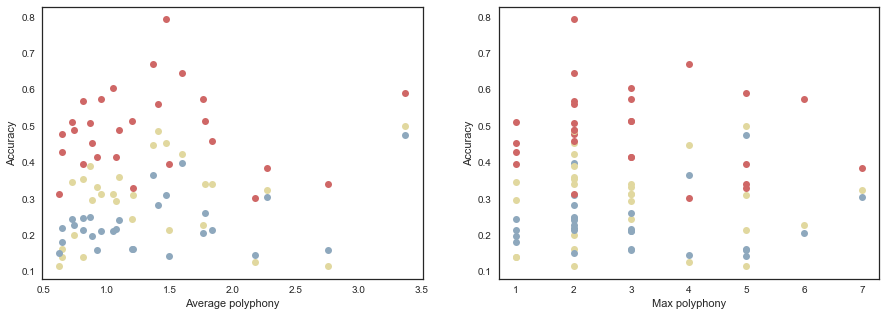

In [41]:
metric = 'Accuracy'
bittner_accuracy = df_bittner[metric]
benetos_accuracy = df_benetos[metric]
duan_accuracy = df_duan[metric]

plt.figure(figsize=(15, 5))
sns.set_style('white')

plt.subplot(1,2, 1)
for i, track in enumerate(tracks):

    plt.plot(track_avg_poly[i], bittner_accuracy[i], 'o', color="#CF6766")
    plt.plot(track_avg_poly[i], benetos_accuracy[i], 'o', color="#E1D89F")
    plt.plot(track_avg_poly[i], duan_accuracy[i], 'o', color="#8EA8BD")
plt.xlabel('Average polyphony')
plt.ylabel(metric)
    
plt.subplot(1,2, 2)
for i, track in enumerate(tracks):

    plt.plot(track_max_poly[i], bittner_accuracy[i], 'o', color="#CF6766")
    plt.plot(track_max_poly[i], benetos_accuracy[i], 'o', color="#E1D89F")
    plt.plot(track_max_poly[i], duan_accuracy[i], 'o', color="#8EA8BD")

plt.xlabel('Max polyphony')
plt.ylabel(metric)